# TapTap Send: Analytics Skills Assessment

            Heberto Jimenez - Data Scientist

## Part 1

            In this first part, we will try to understand the data we have, clean it and provide some insights from it.
            This assessment is comleted using python 3.9.6. 

        1. All libraries needed are imported.

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from matplotlib.ticker import StrMethodFormatter

        2. EDA

In [2]:
transactions = pd.read_csv('./Taptap Send Analytics - Skills Assessment data.csv')
transactions.head(3)

,date,user_id,sender_currency,sender_amt,sender_country,recipient_currency,recipient_amt,recipient_network
0,01/01/2019,"197,081,044,694,864,000",GBP,87.82,GB,XAF,65448.0,airphone-gabon
1,02/01/2019,"396,952,258,228,523,000",EUR,22.87,IT,XAF,15000.0,airphone-gabon
2,02/01/2019,"439,791,033,362,944,000",EUR,23.78,IT,XAF,15600.0,airphone-gabon


In [3]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52589 entries, 0 to 52588
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                52589 non-null  object 
 1   user_id             52589 non-null  object 
 2   sender_currency     52589 non-null  object 
 3   sender_amt          52589 non-null  float64
 4   sender_country      52589 non-null  object 
 5   recipient_currency  52589 non-null  object 
 6   recipient_amt       52589 non-null  float64
 7   recipient_network   52589 non-null  object 
dtypes: float64(2), object(6)
memory usage: 3.2+ MB


In [4]:
transactions.describe()

,sender_amt,recipient_amt
count,52589.000000,5.258900e+04
mean,104.188051,6.437023e+04
std,144.365443,9.409985e+04
min,1.000000,1.140600e+02
25%,26.510000,1.500000e+04
50%,50.000000,3.083000e+04
75%,115.000000,7.000000e+04
max,1995.000000,1.509638e+06


- Date column is object type, column type is seet to datetime.
- From the first values, it can be seen that last 3 digits are 000,
  values with last 3 digist different to 000 are filtered

In [5]:
transactions['date'] = pd.to_datetime(transactions['date'], format='%d/%m/%Y')
transactions['user_id'] = transactions['user_id'].str.replace(',','-')

transactions[transactions['user_id'].str.rsplit('-', n=1).str[-1] != '000']

,date,user_id,sender_currency,sender_amt,sender_country,recipient_currency,recipient_amt,recipient_network


- As seen, all user id ends with '-000'. This is removed

In [6]:
transactions['user_id'] = transactions['user_id'].str[:-4]

In [20]:
s = ', '.join(list(transactions['sender_currency'].unique()))
r = ', '.join(list(transactions['recipient_currency'].unique()))
c = ', '.join(list(transactions['sender_country'].unique()))
n = ', '.join(list(transactions['recipient_network'].unique()))

print(f'Source currencies are: {s} while receipt currencies are: {r}.\nMoney is coming from {c}.\nNetwork used are: {n}')

transactions.head(3)

Source currencies are: GBP, EUR while receipt currencies are: XAF, KES, TSh.
Money is coming from GB, IT, ES, CH, PT, DE, FR.
Network used are: airphone-gabon, airphone-kenya, airphone-tanzania, purple-gabon, kenya, vandyke-kenya, zabarpay-cameroon, zabarpay-chad, zabarpay-gabon, zabarpay-kenya


,date,user_id,sender_currency,sender_amt,sender_country,recipient_currency,recipient_amt,recipient_network
0,2019-01-01,197-081-044-694-864,GBP,87.82,GB,XAF,65448.0,airphone-gabon
1,2019-01-02,396-952-258-228-523,EUR,22.87,IT,XAF,15000.0,airphone-gabon
2,2019-01-02,439-791-033-362-944,EUR,23.78,IT,XAF,15600.0,airphone-gabon


        3. Visualization

In [94]:
total_sum = transactions.groupby(['sender_currency',transactions['date']], as_index=False)[['sender_amt','recipient_amt']].sum()
avg_sum = transactions.groupby(['sender_currency',transactions['date']], as_index=False)[['sender_amt','recipient_amt']].mean()

/var/folders/_z/3mgc1kpn5tv70ww68dl546mh0000gn/T/ipykernel_4107/3317306385.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(total_sum['date'],rotation=45)
/var/folders/_z/3mgc1kpn5tv70ww68dl546mh0000gn/T/ipykernel_4107/3317306385.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(total_sum['date'],rotation=45)


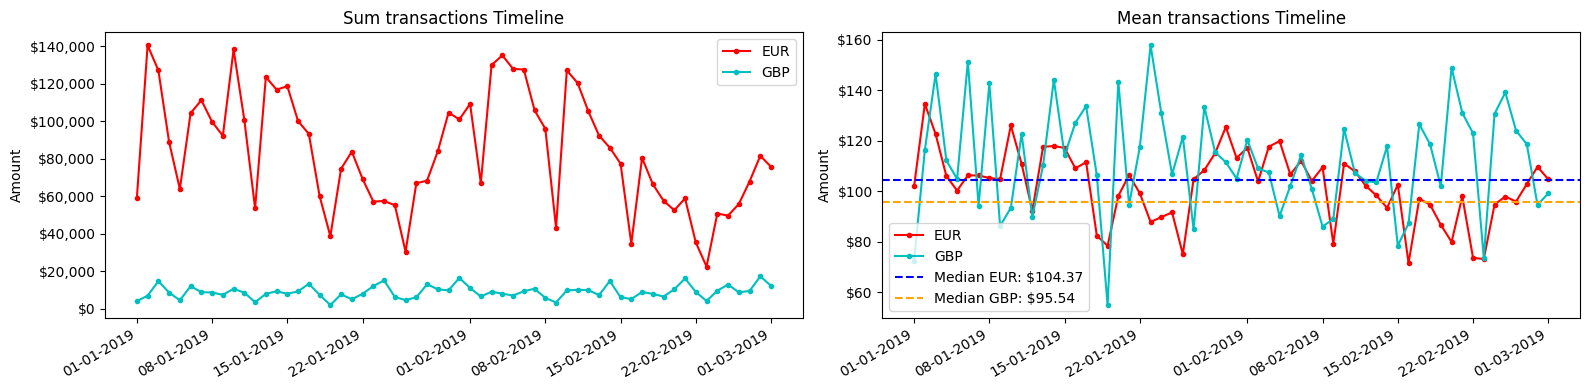

In [104]:
fig, (ax,ax2) = plt.subplots(1,2,figsize=(16, 4))

ax.plot((total_sum[total_sum['sender_currency']=='EUR'])['date'], (total_sum[total_sum['sender_currency']=='EUR'])['sender_amt'], "r.-", label = 'EUR')
ax.plot((total_sum[total_sum['sender_currency']=='GBP'])['date'], (total_sum[total_sum['sender_currency']=='GBP'])['sender_amt']*1.17, "c.-", label = 'GBP')
ax.set_title("Sum transactions Timeline")
ax.set_ylabel("Amount")
ax.set_xticklabels(total_sum['date'],rotation=45)
ax.legend()

ax2.plot((avg_sum[avg_sum['sender_currency']=='EUR'])['date'], (avg_sum[avg_sum['sender_currency']=='EUR'])['sender_amt'], "r.-", label = 'EUR')
ax2.plot((avg_sum[avg_sum['sender_currency']=='GBP'])['date'], (avg_sum[total_sum['sender_currency']=='GBP'])['sender_amt']*1.17, "c.-", label = 'GBP')
median_currency_1 = (avg_sum[avg_sum['sender_currency']=='EUR'])['sender_amt'].median()
median_currency_2 = (avg_sum[avg_sum['sender_currency']=='GBP'])['sender_amt'].median()
ax2.axhline(median_currency_1, color='blue', linestyle='--', label=f'Median EUR: ${median_currency_1:.2f}')
ax2.axhline(median_currency_2, color='orange', linestyle='--', label=f'Median GBP: ${median_currency_2:.2f}')
ax2.legend()
ax2.set_title("Mean transactions Timeline")
ax2.set_ylabel("Amount")
ax2.set_xticklabels(total_sum['date'],rotation=45)


date_format = DateFormatter('%d-%m-%Y')
money_format = StrMethodFormatter('${x:,.0f}')

ax.xaxis.set_major_formatter(date_format)
ax.yaxis.set_major_formatter(money_format)
ax2.xaxis.set_major_formatter(date_format)
ax2.yaxis.set_major_formatter(money_format)


fig.autofmt_xdate()
plt.tight_layout()
plt.show()

The graph contains values of GBP, escalated to EUR. As shown, most of the transactions are done with EUR.

/var/folders/_z/3mgc1kpn5tv70ww68dl546mh0000gn/T/ipykernel_4107/2531075482.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(network['recipient_network'],rotation=45)


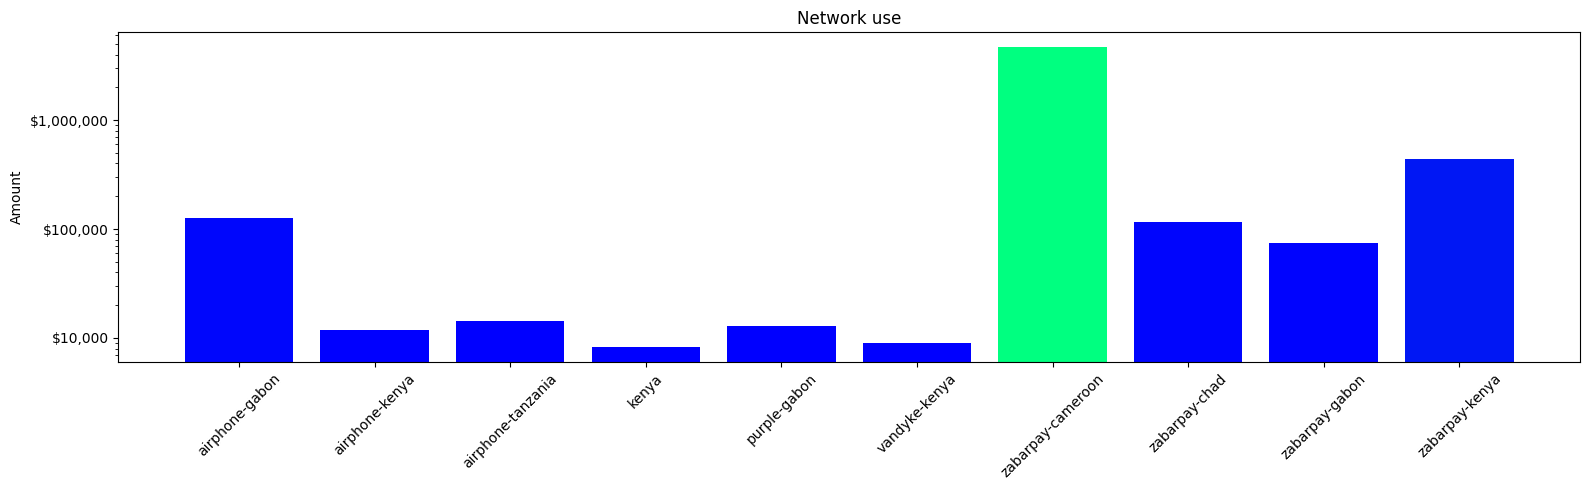

In [139]:
network = transactions.groupby(['recipient_network'], as_index=False)[['sender_amt']].sum()

rec = transactions.groupby(['recipient_network'], as_index=False)[['recipient_currency']].count()

y = network['sender_amt']
x = network['recipient_network']

fig, ax = plt.subplots(figsize=(16, 5))

my_cmap = plt.get_cmap("winter")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))

bars = ax.bar(x,y, color=my_cmap(rescale(y)))



ax.set_title("Network use")
ax.set_ylabel("Amount")
ax.set_xticklabels(network['recipient_network'],rotation=45)
ax.set_yscale('log')
money_format = StrMethodFormatter('${x:,.0f}')

ax.yaxis.set_major_formatter(money_format)

plt.tight_layout()
plt.show()

Most of the transactions goes to zabarpay-cameroon. It means that cameron is the most active country.

In [138]:
grouped = transactions.groupby(['recipient_network', 'recipient_currency']).size().reset_index(name='count')
pivot_table = grouped.pivot(index='recipient_network', columns='recipient_currency', values='count').fillna(0)
pivot_table

recipient_currency,KES,TSh,XAF
recipient_network,,,
airphone-gabon,0.0,0.0,1261.0
airphone-kenya,177.0,0.0,0.0
airphone-tanzania,0.0,157.0,0.0
kenya,96.0,0.0,0.0
purple-gabon,0.0,0.0,109.0
vandyke-kenya,158.0,0.0,0.0
zabarpay-cameroon,0.0,0.0,44909.0
zabarpay-chad,0.0,0.0,802.0
zabarpay-gabon,0.0,0.0,774.0


As seen in previous table, one network only receives one type of currency.

        3. Stratigic Questions

- What are the most meaningful or informative criteria for segmenting the customer
base?
    * The country of origin and the country of reception, based on that, we could segment the most active users

- Where is TTS strongest and weakest in terms of volume /market position (both send and receive
markets)?
    * TTS has covered the European market and has achieved great results with users connected to Cameroon. The connection between Europe and Africa is the market that TTS has developed. However, users with connections different from Cameroon tend to use different providers. Perhaps, Kenya has double the population of Cameroon, transactions to Kenya are not even 10% of those to Cameroon. TTS should try to reach more countries, aside to cameroon, and, create more connections: Markets such as Asia and LATAM.

- What customer segments should TTS prioritize in terms of marketing and retention efforts and why?
    * Retention should be focused on Cameroon, families in this country trust our services, and keeping these clients can help us to develop other countries in Africa, for example Kenya is double the population double the GDP of Cameroon. Marketing campaings in LATAM and ASIA should strat soon, 

        4. SQL

Table name = Transactions

- The average transaction size from each sender country


SELECT 
        sender_country,
        AVG(sender_amt)
FROM
        Transactions
Grouped By sender_country
Order BY AVG(sender_amt)

- The % growth in transaction numbers in Gabon month on month

SELECT
        MONTH(date),
        sender_amt,
        sender_amt - LAG (sender_amt) OVER (ORDER BY MONTH(date) ASC) AS growth,
        (sender_amt - LAG (sender_amt) OVER (ORDER BY MONTH(date) ASC))/LAG (sender_amt) OVER (ORDER BY MONTH(date) ASC)*100 AS percentage_growth

FROM Transactions
WHERE recipient_network like '%gabon%'
Grouped By MONTH(date)